In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
%matplotlib inline

In [ ]:
print(os.getcwd())
os.chdir('C:\\Users\\Carrie Zhu\\Documents\\Research\\GWAS-frontera\\LDSC')
print(os.getcwd())

In [ ]:
df = pd.read_csv("height_posteriors.txt",sep="\t")

## Heritability Plot

#### Heritability by Sex

In [ ]:
os.chdir('C:\\Users\\Carrie Zhu\\Documents\\Research\\GWAS-frontera\\LDSC')

In [ ]:
df = pd.read_csv("h2_plots.txt", sep="\t")
#df = df[df.Phenotype != 'Total Bilirubin']

In [ ]:
x = np.arange(0,len(df.Phenotype.unique()))
df['H2 SE'] = pd.to_numeric(df['H2 SE'])
df.Heritability = pd.to_numeric(df.Heritability)
y1 = df.Heritability.where(df.Sex == 'Both').dropna()
y2 = df.Heritability.where(df.Sex == 'Female').dropna()
y3 = df.Heritability.where(df.Sex == 'Male').dropna()
e1 = df['H2 SE'].where(df.Sex == 'Both').dropna()
e2 = df['H2 SE'].where(df.Sex == 'Female').dropna()
e3 = df['H2 SE'].where(df.Sex == 'Male').dropna()

In [ ]:
fig = plt.figure(figsize=(20,8))
plt.scatter(x-0.15,y1, label="Both")
plt.scatter(x,y2, label="Female")
plt.scatter(x+0.15,y3, label="Male")
plt.errorbar(x-0.15,y1,yerr=2*e1,linestyle="none",label="2SE")
plt.errorbar(x,y2,yerr=2*e2,linestyle="none")
plt.errorbar(x+0.15,y3,yerr=2*e3,linestyle="none")
plt.xticks(x,df.Phenotype.unique(), rotation = 'vertical', fontsize='x-large')
plt.yticks(fontsize='x-large')
plt.xlabel("Phenotype", fontsize='x-large')
plt.ylabel("Heritability", fontsize='x-large')
plt.legend(fontsize='large')
plt.title("Heritability by Sex", fontsize = 'xx-large')

#plt.tight_layout()
#plt.savefig("h2_plot.png")

#### My and Neale Lab Heritability Comparision

In [ ]:
df_n = pd.read_csv("h2_neale.txt", sep="\t")
df_n.head()
df_n.Neale_h2 = pd.to_numeric(df_n.Neale_h2)
df_n.Neale_SE = pd.to_numeric(df_n.Neale_SE)
y_n = df_n.Neale_h2
e_n = df_n.Neale_SE

In [ ]:
fig = plt.figure(figsize=(20,16))
plt.scatter(x-0.15,y1, label="My LDSC")
plt.scatter(x[0:14],y_n,label="Neale Lab")
plt.xticks(x,df.Phenotype.unique(), rotation = 'vertical', fontsize='x-large')
plt.errorbar(x-0.15,y1,yerr=2*e1,linestyle="none",label="2SE")
plt.errorbar(x[0:14],y_n,yerr=2*e_n,linestyle="none")
plt.yticks(fontsize='x-large')
plt.xlabel("Phenotype", fontsize='x-large')
plt.ylabel("Heritability", fontsize='x-large')
plt.legend(fontsize='large')
plt.title("Neale Lab and My LDSC Heritability Comparision", fontsize = 'xx-large')

#plt.tight_layout()
#plt.savefig("h2_neale.png")

#### Relative Heritability Ordered by Genetic Correlation

In [ ]:
df_corr = df.sort_values('Correlation', ascending=False).reset_index(drop=True)
df_corr.head()
relative = []
relative_se = []
for i, row in df_corr.iterrows():
    pheno = row.Phenotype
    both_h2 = df_corr.loc[(df_corr.Phenotype == pheno) & (df_corr.Sex == 'Both'), ['Heritability']].squeeze()
    h2 = row.Heritability / both_h2
    se = ((row.Heritability + row['H2 SE']) / both_h2) - h2
    relative.append(h2)
    relative_se.append(se)
df_corr['Relative'] = relative
df_corr['Relative_SE'] = relative_se

y4 = df_corr.Relative.where(df_corr.Sex == 'Both').dropna()
y5 = df_corr.Relative.where(df_corr.Sex == 'Female').dropna()
y6 = df_corr.Relative.where(df_corr.Sex == 'Male').dropna()
e4 = df_corr['Relative_SE'].where(df_corr.Sex == 'Both').dropna()
e5 = df_corr['Relative_SE'].where(df_corr.Sex == 'Female').dropna()
e6 = df_corr['Relative_SE'].where(df_corr.Sex == 'Male').dropna()

print(df_corr[df_corr.Phenotype == 'Calcium'])
df[df.Phenotype == 'Calcium']

In [ ]:
fig = plt.figure(figsize=(20,12))
plt.scatter(x-0.15,y4, label="Both")
plt.scatter(x,y5, label="Female")
plt.scatter(x+0.15,y6, label="Male")
plt.errorbar(x-0.15,y4,yerr=2*e4,linestyle="none",label="2SE")
plt.errorbar(x,y5,yerr=2*e5,linestyle="none")
plt.errorbar(x+0.15,y6,yerr=2*e6,linestyle="none")
plt.xticks(x,df_corr.Phenotype.unique(), rotation = 'vertical', fontsize='x-large')
plt.yticks(fontsize='x-large')
plt.xlabel("Phenotype", fontsize='x-large')
plt.ylabel("Relative Heritability", fontsize='x-large')
plt.axhline(y=1,linestyle='dashed',alpha=0.3)
plt.legend(fontsize='large', loc=(0.85,0.85))
plt.title("Relative Heritability Ordered by Genetic Correlation (Descending)", fontsize = 'xx-large')

#plt.tight_layout()
#plt.savefig("relative_h2.png")

## Mixture Proportion Plot

In [53]:
os.chdir('C:\\Users\\Carrie Zhu\\Documents\\Research\\GWAS-frontera\\GWAS_Results\\creatinine')

In [54]:
df = pd.read_csv("creatininemixprop.txt",sep="\t")
df['x_label'] = df.index.astype(str)
df.head()

,x,x_label
NaN,0.171561,nan
ED_PCA_1,0.000000,ED_PCA_1
ED_PCA_2,0.000000,ED_PCA_2
ED_tPCA,0.000000,ED_tPCA
identity,0.000000,identity


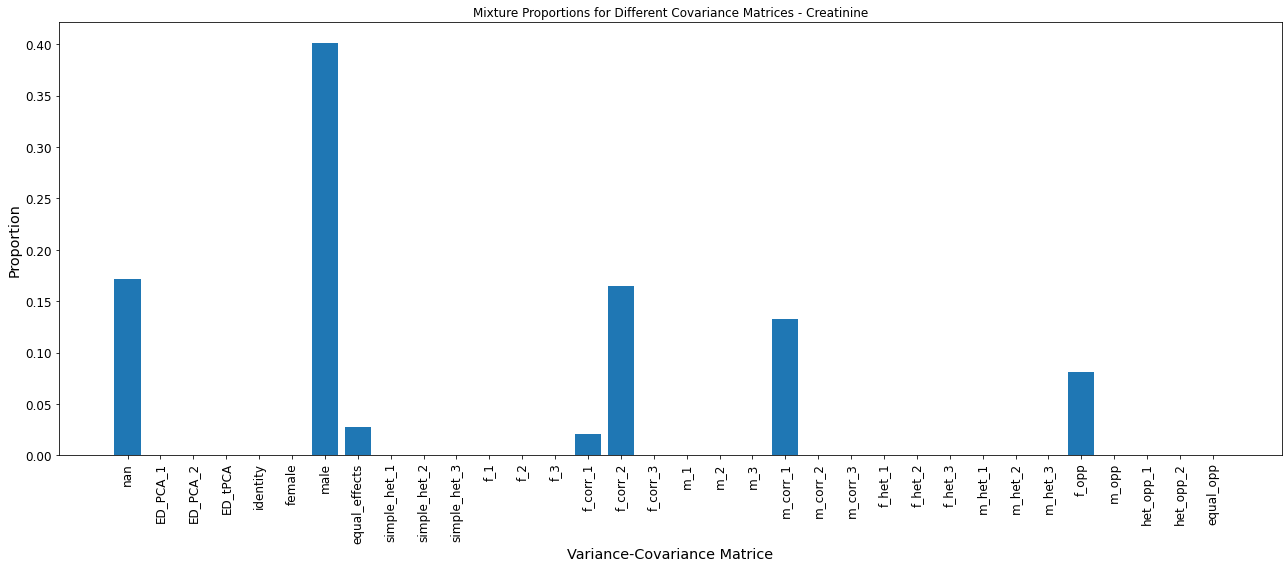

In [55]:
fig = plt.figure(figsize=(18,8))
plt.bar(df.x_label,pd.to_numeric(df.x))
plt.xticks(rotation = 'vertical', fontsize='large')
plt.yticks(fontsize='large')
plt.xlabel('Variance-Covariance Matrice', fontsize='x-large')
plt.ylabel('Proportion', fontsize='x-large')
plt.title('Mixture Proportions for Different Covariance Matrices - Creatinine')

plt.tight_layout()
plt.savefig("creatininemixpropbar.png")